In [1]:
#Essential Libraries
import numpy as np # fast matrix operations
import matplotlib
import matplotlib.pyplot as plt # visuallizing the data
import pandas as pd # to load our csv file without any pain

In [2]:
# Reading csv using Pandas dataframe
# we will use read_csv method to read the data
dataset = pd.read_csv("data\Youtube04-Eminem.csv")

In [3]:
# Check our data using head method
dataset.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


As we can see our data is divided into 5 columns
Comment_ID , Author , Date, Content , Class

In CLASS 1 = Spam
         0 = Ham

We will only be concentrating on Content side not on Comment_ID,Author or Date we have to remove this and clean our data

In [4]:
dataset = dataset.drop(['COMMENT_ID','AUTHOR','DATE'],axis = 1) # axis = 1 --> to remove whole column not just a row

In [5]:
dataset.groupby("CLASS").describe()

CONTENT                                               
        count unique                                top freq
CLASS                                                       
0         203    202                      amazing song﻿    2
1         245    210  Check out this video on YouTube:﻿   19

In [6]:
dataset['LENGTH'] = dataset['CONTENT'].apply(len)

In [7]:
dataset.head(5)

,CONTENT,CLASS,LENGTH
0,+447935454150 lovely girl talk to me xxx﻿,1,41
1,I always end up coming back to this song<br />﻿,0,47
2,"my sister just received over 6,500 new <a rel=...",1,201
3,Cool﻿,0,5
4,Hello I&#39;am from Palastine﻿,1,30


[]

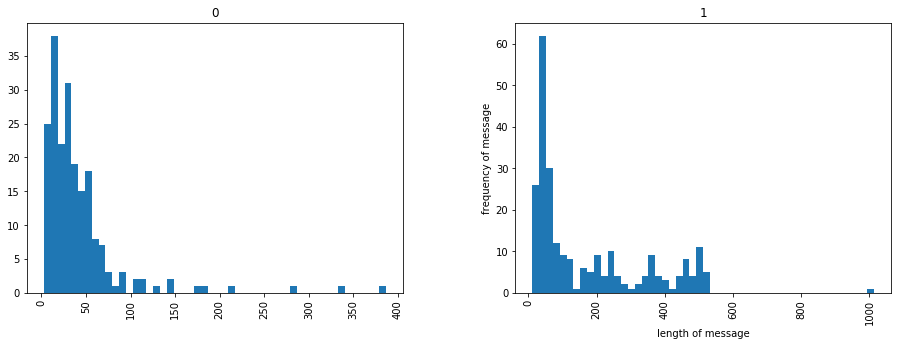

In [8]:
 # Time to visualizing the data :D
dataset.hist(column='LENGTH', by='CLASS', bins=50,figsize=(15,5))
plt.xlabel('length of message')
plt.ylabel('frequency of message')
plt.plot()

Looks like more the length of messages more likely it is a SPAM !

*TEXT PROCESSING AND VECTORIZING OUR DATA*

In [9]:
# Libraries for text processing
# String library for basic string operations 
import string

# TfidVectorizer -- converts raw document to matrix -- this module is basically combination of --
# CountVectorizer followed by TfidfTransformer
# Let me explain TfidVectorizer in detail
'''
"Hello world" is a document in corpus ,so we have 2 document .

Countvectorizer gives equal weightage to all the words, i.e. 
a word is converted to a column (in a dataframe for example) and for each document,
it is equal to 1 if it is present in that doc else 0. 

Tf - term frequency says how important that word is to that document with respect to the corpus.

'''

from sklearn.feature_extraction.text import TfidfVectorizer

# now SnowballStemmer -- It is used to see which language is been used.
# Stemmer basicall removes last characters eg. careless converts to care and plotted to plot
from nltk.stem import SnowballStemmer

# stopwords - removes most commonly use word in corpus
# eg. - I like machine learning. --will be converted to--> like,machine,learning 
from nltk.corpus import stopwords

In [10]:
# lets us make a copy of our data for later use :)
# we will use copy function which is provided by python gods :)
copied_data = dataset['CONTENT'].copy()
copied_data.head()

0            +447935454150 lovely girl talk to me xxx﻿
1      I always end up coming back to this song<br />﻿
2    my sister just received over 6,500 new <a rel=...
3                                                Cool﻿
4                       Hello I&#39;am from Palastine﻿
Name: CONTENT, dtype: object

Now,
Lets, define a function - process_my_text() to remove punctuation and stopwords aswell.

In [11]:
def process_my_text(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [12]:
# let us process our data! 
copied_data = copied_data.apply(process_my_text)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(copied_data)

TIME TO CLASSIFY THE DATA :D

In [13]:
# Before classifing lets split our data!
# We will use a helper func from library sklearn , train_test_split 
from sklearn.model_selection import train_test_split

feature_train,feature_test,training_label,testing_label = train_test_split(features,dataset['CLASS'],
                                                                           test_size = 0.25,random_state = 42)


Score =  0.9196428571428571


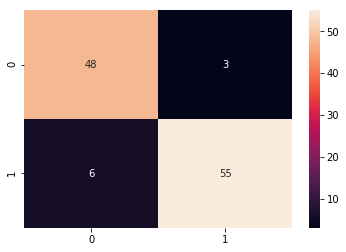

In [14]:
# sklearn's inbuild fuction LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(feature_train,training_label)
print("Score = ",clf.score(feature_test,testing_label))


ypred = clf.predict(feature_test)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testing_label, ypred)

import seaborn as sns
sns.heatmap(confusion_matrix,annot=True)

# so our 48 and 55 are correct number of prediction 
# 6 and 3 are incorrect number of prediction

This is just a notebook implementing sklearn's logistic regression